# Plot 1xs result as a function for PhT, for different z(in one plot, separate by color and offset) per Q2 bins, for one phih bin(-Pi to Pi), so there are lots of PhT bins

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import lhapdf


In [16]:

def Get_weighted_average(value,error):
    Factor=(0.3894*1e6)
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += Factor*value[i]/((Factor)**2*error[i]**2)
        sum_sigma += 1/(Factor**2*error[i]**2)
    if sum_sigma!=0:
        return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
    else:
        return -1,0
def Get_weighted_average_phi(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    if sum_sigma!=0:
        return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
    else:
        return -1,0

In [17]:

#for pip
df_3xs_x1_22_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpip_22GeV_He3.dat',delim_whitespace=True)
df_3xs_x1_22_zQ2xbjPhT.head()
df_3xs_x1_11_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpip_lowQ2_Pt_lumi3_He3.dat',delim_whitespace=True)
df_3xs_x1_11_zQ2xbjPhT.head()
df_3xs_x1_11_hQ2_zQ2xbjPhT = pd.read_csv('Materials/results_June2024/onephi_Sep/simenhancedpip_highQ2_Pt_lumi3_He3.dat',delim_whitespace=True)
df_3xs_x1_11_hQ2_zQ2xbjPhT.head()

,i,Ebeam,x,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.319154,0.520537,0.323184,3.394296,0.017623,FUUT,0.004044,0.000444,0.0,0.0,He3,pi+,solid,0.000444
1,1,11.0,0.320529,0.518796,0.323264,3.395767,0.032397,FUUT,0.004011,0.000444,0.0,0.0,He3,pi+,solid,0.000444
2,2,11.0,0.321296,0.517458,0.323346,3.393145,0.042183,FUUT,0.003992,0.000442,0.0,0.0,He3,pi+,solid,0.000442
3,3,11.0,0.322349,0.516166,0.323357,3.393765,0.050239,FUUT,0.003965,0.000438,0.0,0.0,He3,pi+,solid,0.000438
4,4,11.0,0.323179,0.514946,0.323350,3.392486,0.057152,FUUT,0.003946,0.000448,0.0,0.0,He3,pi+,solid,0.000448


In [18]:
PI = math.pi
print(PI)
#z_cuts=[0.3,0.4,0.5,0.6]
z_cuts=[0.3,0.4,0.5,0.6,0.7]
Q2_cuts=[1,2,4,6,20]
#Q2_cuts=[2,4,6,10,20]
#Q2_cuts=[1,3,6,10,20]
xbj_cuts=[0,0.25,0.5,0.7]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.4,0.45,0.5,0.55,0.6,0.7,0.8,1.6]
df_3xs_zQ2_22=df_3xs_x1_22_zQ2xbjPhT[(df_3xs_x1_22_zQ2xbjPhT['Ebeam']==22)&(df_3xs_x1_22_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_22_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2_11_lQ2=df_3xs_x1_11_zQ2xbjPhT[(df_3xs_x1_11_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_11_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_11_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2_11_hQ2=df_3xs_x1_11_hQ2_zQ2xbjPhT[(df_3xs_x1_11_hQ2_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_11_hQ2_zQ2xbjPhT['x']>xbj_cuts[0])&(df_3xs_x1_11_hQ2_zQ2xbjPhT['x']<xbj_cuts[1])]
df_3xs_zQ2_11=pd.concat([df_3xs_zQ2_11_lQ2,df_3xs_zQ2_11_hQ2], ignore_index=True)

3.141592653589793


   i  Ebeam         x         y         z        Q2        pT   obs     value   
0  0   11.0  0.148401  0.460127  0.323600  1.395059  0.025838  FUUT  0.030659  \
1  1   11.0  0.144967  0.469019  0.323519  1.384619  0.047115  FUUT  0.030367   
2  2   11.0  0.142071  0.476625  0.323531  1.375988  0.060577  FUUT  0.030084   
3  3   11.0  0.139508  0.483251  0.323386  1.367870  0.070407  FUUT  0.029900   
4  4   11.0  0.137442  0.488711  0.323293  1.361541  0.078490  FUUT  0.029715   

       stat  systrel  systabs target hadron Experiment     error  
0  0.000307      0.0      0.0    He3    pi+      solid  0.000307  
1  0.000300      0.0      0.0    He3    pi+      solid  0.000300  
2  0.000303      0.0      0.0    He3    pi+      solid  0.000303  
3  0.000323      0.0      0.0    He3    pi+      solid  0.000323  
4  0.000312      0.0      0.0    He3    pi+      solid  0.000312  
1022
633
400
246


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

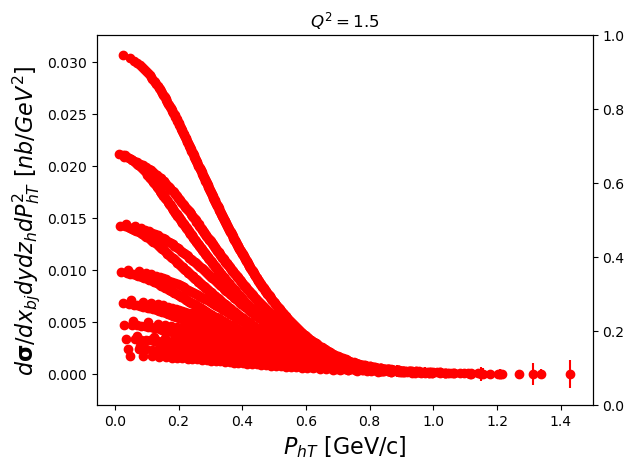

In [19]:
#plot for the Q2 bins
i_Q2=1
fig, ax = plt.subplots()
ax_right = ax.twinx()

df_3xs_z_11=df_3xs_zQ2_11[(df_3xs_zQ2_11['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2_11['Q2']<Q2_cuts[i_Q2])]
df_3xs_z_11=df_3xs_zQ2_11[(df_3xs_zQ2_11['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2_11['Q2']<Q2_cuts[i_Q2])]
print(df_3xs_z_11.head())
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['k','g','r','c','m','y','navy','purple']
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs_11=df_3xs_z_11[(df_3xs_z_11['z']>z_cuts[i_z-1])&(df_3xs_z_11['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus_11=df_3xs_11['value'].to_list()
    Fuu_stats_11=df_3xs_11['stat'].to_list()
    pTs_11=df_3xs_11['pT'].to_list()
    #legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    print(len(pTs_11))
    ax.scatter(pTs_11,Fuus_11, color=color[2])
    ax.errorbar(pTs_11,Fuus_11,Fuu_stats_11,color=color[2],ls='none')
    #zs_11=df_3xs_11['z'].to_list()
    #pTs_11=df_3xs_11['pT'].to_list()
    #ax_right.scatter(pTs_11,zs_11, color=color[0])

plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
ax.set_xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
ax.set_ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
#ax_right.set_ylabel(r'z',fontsize=16)

8
8
8
8


Text(0, 0.5, '${d \\bf{\\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]')

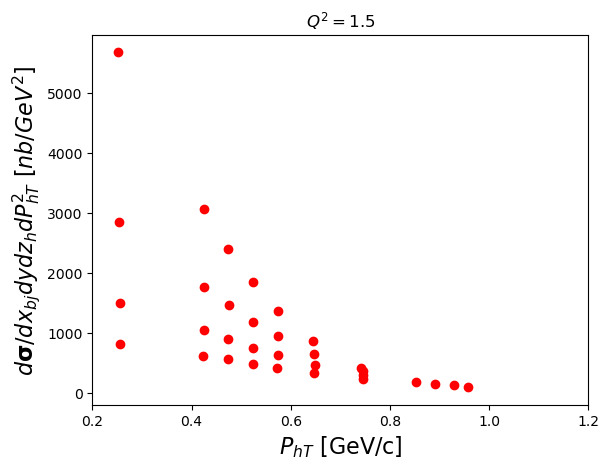

In [20]:
#plot for the Q2 bins
i_Q2=1
#file=open('Materials/results_June2024/onephi/numbers.txt','w')
#file.write('i,Ebeam,x,xl,xr,phih,phihl,phihr,y,z,zl,zr,Q2,Q2l,Q2r,pT,pTl,pTr,obs,value,stat,syst,target,hadron\n')
df_3xs_z_11=df_3xs_zQ2_11[(df_3xs_zQ2_11['Q2']>Q2_cuts[i_Q2-1])&(df_3xs_zQ2_11['Q2']<Q2_cuts[i_Q2])]
#factor_zs=[10,9,8,7,6,5,4,3,2,1]
color=['k','g','r','c','m','y','navy','purple']
i_counts=0
for i_z in range(1,len(z_cuts)):
    #print(z_cuts[i_z])
    df_3xs_11=df_3xs_z_11[(df_3xs_z_11['z']>z_cuts[i_z-1])&(df_3xs_z_11['z']<z_cuts[i_z])]
    #print(len(df_3xs))
    Fuus_11=[]
    Fuu_stats_11=[]
    pTs_11=[]
    for i_PhT in range(1,len(PhT_cuts)):
        df_3xs_PhT_11=df_3xs_11[(df_3xs_11['pT']>PhT_cuts[i_PhT-1])&(df_3xs_11['pT']<PhT_cuts[i_PhT])]
        #print(len(df_3xs_PhT))
        
        _Fuu_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _Fuu_stat_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[1]
        _pT_11= Get_weighted_average_phi(df_3xs_PhT_11['pT'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _z_11=Get_weighted_average_phi(df_3xs_PhT_11['z'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _Q2_11=Get_weighted_average_phi(df_3xs_PhT_11['Q2'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _x_11=Get_weighted_average_phi(df_3xs_PhT_11['x'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
        _y_11=Get_weighted_average_phi(df_3xs_PhT_11['y'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
        _sys = _Fuu_11*0.1
        #_target=df_3xs_PhT['target'].tolist()[0]
        #_hadron=df_3xs_PhT['hadron'].tolist()[0]
        #file.write('{},{},{:.3f},{:.2f},{:.2f},{:.5f},{:.3f},{:.3f},{:.5f},{:.3f},{:.2f},{:.2f},{:.4f},{:.4f},{:.4f},{:.5f},{:.2f},{:.2f},{},{:.5f},{:.5f},{:.5f},{},{}\n'.format(i_counts,11,_x,xbj_cuts[0],xbj_cuts[1],_phih,-math.pi,math.pi,_y,_z,z_cuts[i_z-1],z_cuts[i_z],_Q2,Q2_cuts[i_Q2-1],Q2_cuts[i_Q2],_pT,PhT_cuts[i_PhT-1],PhT_cuts[i_PhT],'FuuA',_Fuu,_Fuu_stat,_sys,_target,_hadron))
        #print(_pT)
        Fuus_11.append(_Fuu_11)
        Fuu_stats_11.append(_Fuu_stat_11)
        pTs_11.append(_pT_11)
        i_counts+=1
    legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
    plt.errorbar(pTs_11,Fuus_11,Fuu_stats_11,color=color[2],ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o')
    
    print(len(pTs_11))
    plt.scatter(pTs_11,Fuus_11, color=color[2], label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,ls='none')
    #plt.errorbar(pTs,Fuus,Fuu_stats,mec=color[i_z],mfc=color[i_z],mfcalt=color[i_z],label=legend)
    #plt.errorbar(pTs,Fuus,Fuu_stats,marker='o',color=color[i_z])

plt.xlim(0.2,1.2)
#plt.legend()
#plt.yscale('log')
plt.title(r'$Q^2=$'+str(round((Q2_cuts[i_Q2-1]+Q2_cuts[i_Q2])/2,3)))
plt.xlabel(r'$P_{hT}$ [GeV/c]',fontsize=16)
plt.ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)

#file.close()

1
0.3
0.4
0.5
0.6
2
0.3
0.4
0.5
0.6
4
0.3
0.4
0.5
0.6
6
0.3
0.4
0.5
0.6


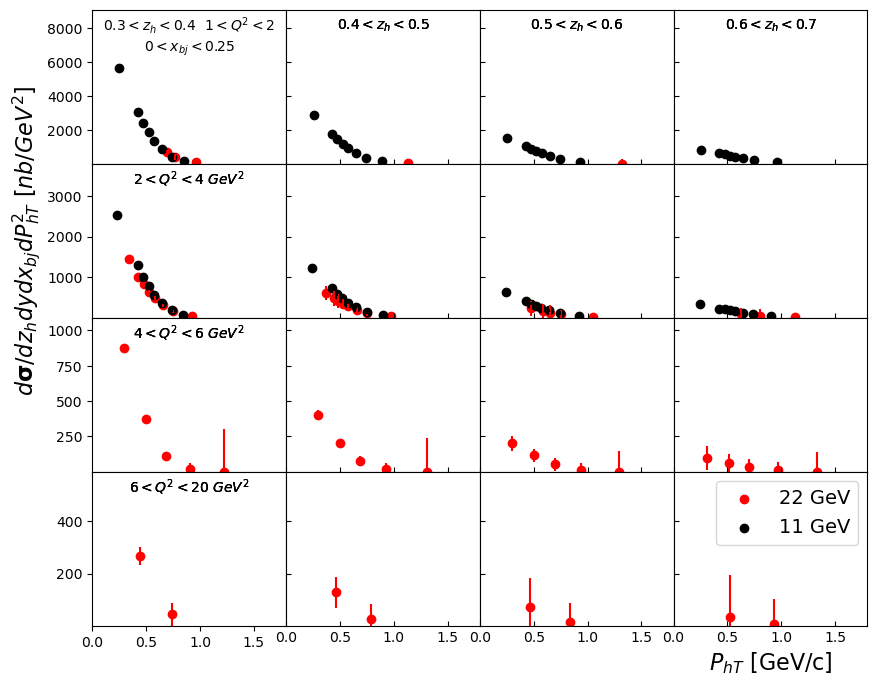

In [21]:
Q2_cuts=[1,2,4,6,20]
fig, axs = plt.subplots(len(Q2_cuts)-1,len(z_cuts)-1,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
Y_lim=[9111,3800,1090,590,99,100]
plt.xlabel('$P_{hT}$ [GeV/c]',fontsize=16)
plt.xlim(0,1.8)
for i_q2 in range(0,len(Q2_cuts)-1):
    print(Q2_cuts[i_q2])
    df_3xs_z_22=df_3xs_zQ2_22[(df_3xs_zQ2_22['Q2']>Q2_cuts[i_q2])&(df_3xs_zQ2_22['Q2']<Q2_cuts[i_q2+1])]
    df_3xs_z_11=df_3xs_zQ2_11[(df_3xs_zQ2_11['Q2']>Q2_cuts[i_q2])&(df_3xs_zQ2_11['Q2']<Q2_cuts[i_q2+1])]
    
    #print(df_3xs_z_11['Q2'])
    if Q2_cuts[i_q2]==4:
        PhT_cuts=[0,0.4,0.6,0.8,1.2,1.8]
    if Q2_cuts[i_q2]==6:
    #    z_cuts=[0.3,0.5,0.7]
        PhT_cuts=[0,0.6,1.8]
    for i_z in range(0,len(z_cuts)-1):
        print(z_cuts[i_z])
        #print(z_cuts[i_z])
        df_3xs_22=df_3xs_z_22[(df_3xs_z_22['z']>z_cuts[i_z])&(df_3xs_z_22['z']<z_cuts[i_z+1])]
        #print(len(df_3xs))
        Fuus_22=[]
        Fuu_stats_22=[]
        pTs_22=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT_22=df_3xs_22[(df_3xs_22['pT']>PhT_cuts[i_PhT-1])&(df_3xs_22['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
        
            _Fuu_22 = Get_weighted_average(df_3xs_PhT_22['value'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            _Fuu_stat_22 = Get_weighted_average(df_3xs_PhT_22['value'].tolist(),df_3xs_PhT_22['stat'].tolist())[1]
            _pT_22= Get_weighted_average_phi(df_3xs_PhT_22['pT'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            _z_22=Get_weighted_average_phi(df_3xs_PhT_22['z'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            _Q2_22=Get_weighted_average_phi(df_3xs_PhT_22['Q2'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            _x_22=Get_weighted_average_phi(df_3xs_PhT_22['x'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            
            _y_22=Get_weighted_average_phi(df_3xs_PhT_22['y'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            _sys = _Fuu_22*0.1
            Fuus_22.append(_Fuu_22)
            Fuu_stats_22.append(_Fuu_stat_22)
            pTs_22.append(_pT_22)
            i_counts+=1
        #legend=r'$z_h=$'+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        legend='22 GeV'
        axs[i_q2][i_z].errorbar(pTs_22,Fuus_22,Fuu_stats_22,color=color[2],ls='none')
        axs[i_q2][i_z].scatter(pTs_22,Fuus_22, color=color[2], label=legend)

        df_3xs_11=df_3xs_z_11[(df_3xs_z_11['z']>z_cuts[i_z])&(df_3xs_z_11['z']<z_cuts[i_z+1])]
        Fuus_11=[]
        Fuu_stats_11=[]
        pTs_11=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT_11=df_3xs_11[(df_3xs_11['pT']>PhT_cuts[i_PhT-1])&(df_3xs_11['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
        
            _Fuu_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            _Fuu_stat_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[1]
            _pT_11= Get_weighted_average_phi(df_3xs_PhT_11['pT'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            _z_11=Get_weighted_average_phi(df_3xs_PhT_11['z'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            _Q2_11=Get_weighted_average_phi(df_3xs_PhT_11['Q2'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            _x_11=Get_weighted_average_phi(df_3xs_PhT_11['x'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y_11=Get_weighted_average_phi(df_3xs_PhT_11['y'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            _sys = _Fuu_11*0.1
            Fuus_11.append(_Fuu_11)
            Fuu_stats_11.append(_Fuu_stat_11)
            pTs_11.append(_pT_11)
            i_counts+=1
        #legend=r'$z_h$='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        legend='11 GeV'
        axs[i_q2][i_z].errorbar(pTs_11,Fuus_11,Fuu_stats_11,color=color[0],ls='none')
        axs[i_q2][i_z].scatter(pTs_11,Fuus_11, color=color[0], label=legend)
        axs[i_q2][i_z].set_ylim(1,Y_lim[i_q2])
        if i_z>0 and i_q2>0:
            axs[0][i_z].text(0.5,0.9,r'${}<z_h<{}$'.format(z_cuts[i_z],z_cuts[i_z+1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][i_z].transAxes)
            axs[i_q2][0].text(0.5,0.9,r'${}<Q^2<{}$ $GeV^2$'.format(Q2_cuts[i_q2],Q2_cuts[i_q2+1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_q2][0].transAxes)
        
        if i_z>0 and i_q2<len(Q2_cuts)-1:
            axs[i_q2][i_z].tick_params(direction='in',labelleft=False)
axs[3][3].legend(fontsize=14)
axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ '.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.75,r'${}<x_{{bj}}<{}$'.format(xbj_cuts[0],xbj_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[1][0].set_ylabel(r'${d \bf{\sigma}}/{dz_hdydx_{bj}dP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)   
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/11_22_zQ2.pdf')    

1
0.3
0.4
0.5
0.6
2
0.3
0.4
0.5
0.6
4
0.3
0.4
0.5
0.6
6
0.3
0.4
0.5
0.6


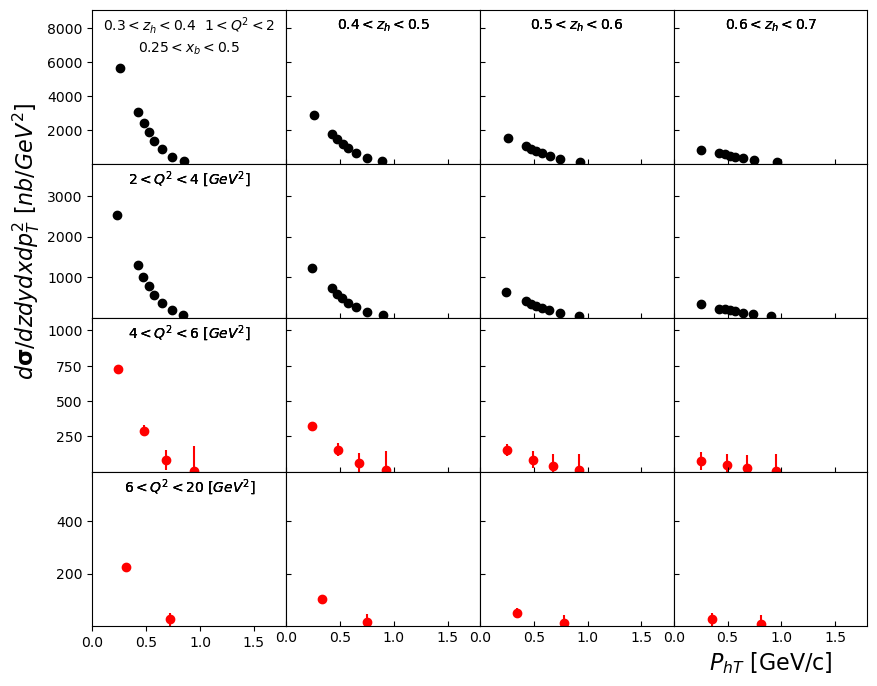

In [8]:
Q2_cuts=[1,2,4,6,20]
PhT_cuts=[0,0.4,0.45,0.5,0.55,0.6,0.7,0.8,1.6]
z_cuts=[0.3,0.4,0.5,0.6,0.7]
df_3xs_x2_zQ2_22=df_3xs_x1_22_zQ2xbjPhT[(df_3xs_x1_22_zQ2xbjPhT['Ebeam']==22)&(df_3xs_x1_22_zQ2xbjPhT['x']>xbj_cuts[1])&(df_3xs_x1_22_zQ2xbjPhT['x']<xbj_cuts[2])]
df_3xs_x2_zQ2_11_lQ2=df_3xs_x1_11_zQ2xbjPhT[(df_3xs_x1_11_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_11_zQ2xbjPhT['x']>xbj_cuts[1])&(df_3xs_x1_11_zQ2xbjPhT['x']<xbj_cuts[2])]
df_3xs_x2_zQ2_11_hQ2=df_3xs_x1_11_hQ2_zQ2xbjPhT[(df_3xs_x1_11_hQ2_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_11_hQ2_zQ2xbjPhT['x']>xbj_cuts[1])&(df_3xs_x1_11_hQ2_zQ2xbjPhT['x']<xbj_cuts[2])]
df_3xs_x2_zQ2_11=pd.concat([df_3xs_zQ2_11_lQ2,df_3xs_zQ2_11_hQ2], ignore_index=True)

fig, axs = plt.subplots(len(Q2_cuts)-1,len(z_cuts)-1,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
Y_lim=[9111,3800,1090,590,99,100]
plt.xlabel('$P_{hT}$ [GeV/c]',fontsize=16)
plt.xlim(0,1.8)
for i_q2 in range(0,len(Q2_cuts)-1):
    print(Q2_cuts[i_q2])
    df_3xs_z_22=df_3xs_x2_zQ2_22[(df_3xs_x2_zQ2_22['Q2']>Q2_cuts[i_q2])&(df_3xs_x2_zQ2_22['Q2']<Q2_cuts[i_q2+1])]
    df_3xs_z_11=df_3xs_x2_zQ2_11[(df_3xs_x2_zQ2_11['Q2']>Q2_cuts[i_q2])&(df_3xs_x2_zQ2_11['Q2']<Q2_cuts[i_q2+1])]
    
    #print(df_3xs_z_11['Q2'])
    if Q2_cuts[i_q2]==4:
        PhT_cuts=[0,0.4,0.6,0.8,1.2,1.8]
    if Q2_cuts[i_q2]==6:
    #    z_cuts=[0.3,0.5,0.7]
        PhT_cuts=[0,0.6,1.8]
    for i_z in range(0,len(z_cuts)-1):
        print(z_cuts[i_z])
        #print(z_cuts[i_z])
        df_3xs_22=df_3xs_z_22[(df_3xs_z_22['z']>z_cuts[i_z])&(df_3xs_z_22['z']<z_cuts[i_z+1])]
        #print(len(df_3xs))
        Fuus_22=[]
        Fuu_stats_22=[]
        pTs_22=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT_22=df_3xs_22[(df_3xs_22['pT']>PhT_cuts[i_PhT-1])&(df_3xs_22['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
        
            _Fuu_22 = Get_weighted_average(df_3xs_PhT_22['value'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            _Fuu_stat_22 = Get_weighted_average(df_3xs_PhT_22['value'].tolist(),df_3xs_PhT_22['stat'].tolist())[1]
            _pT_22= Get_weighted_average_phi(df_3xs_PhT_22['pT'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            _z_22=Get_weighted_average_phi(df_3xs_PhT_22['z'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            _Q2_22=Get_weighted_average_phi(df_3xs_PhT_22['Q2'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            _x_22=Get_weighted_average_phi(df_3xs_PhT_22['x'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            
            _y_22=Get_weighted_average_phi(df_3xs_PhT_22['y'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            _sys = _Fuu_22*0.1
            Fuus_22.append(_Fuu_22)
            Fuu_stats_22.append(_Fuu_stat_22)
            pTs_22.append(_pT_22)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        axs[i_q2][i_z].errorbar(pTs_22,Fuus_22,Fuu_stats_22,color=color[2],ls='none')
        axs[i_q2][i_z].scatter(pTs_22,Fuus_22, color=color[2], label=legend)

        df_3xs_11=df_3xs_z_11[(df_3xs_z_11['z']>z_cuts[i_z])&(df_3xs_z_11['z']<z_cuts[i_z+1])]
        Fuus_11=[]
        Fuu_stats_11=[]
        pTs_11=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT_11=df_3xs_11[(df_3xs_11['pT']>PhT_cuts[i_PhT-1])&(df_3xs_11['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
        
            _Fuu_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            _Fuu_stat_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[1]
            _pT_11= Get_weighted_average_phi(df_3xs_PhT_11['pT'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            _z_11=Get_weighted_average_phi(df_3xs_PhT_11['z'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            _Q2_11=Get_weighted_average_phi(df_3xs_PhT_11['Q2'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            _x_11=Get_weighted_average_phi(df_3xs_PhT_11['x'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y_11=Get_weighted_average_phi(df_3xs_PhT_11['y'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            _sys = _Fuu_11*0.1
            Fuus_11.append(_Fuu_11)
            Fuu_stats_11.append(_Fuu_stat_11)
            pTs_11.append(_pT_11)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        axs[i_q2][i_z].errorbar(pTs_11,Fuus_11,Fuu_stats_11,color=color[0],ls='none')
        axs[i_q2][i_z].scatter(pTs_11,Fuus_11, color=color[0], label=legend)
        axs[i_q2][i_z].set_ylim(1,Y_lim[i_q2])
        if i_z>0 and i_q2>0:
            axs[0][i_z].text(0.5,0.9,r'${}<z_h<{}$'.format(z_cuts[i_z],z_cuts[i_z+1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][i_z].transAxes)
            axs[i_q2][0].text(0.5,0.9,r'${}<Q^2<{}$ [$GeV^2$]'.format(Q2_cuts[i_q2],Q2_cuts[i_q2+1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_q2][0].transAxes)
        
        if i_z>0 and i_q2<len(Q2_cuts)-1:
            axs[i_q2][i_z].tick_params(direction='in',labelleft=False)
axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ '.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.75,r'${}<x_{{b}}<{}$'.format(xbj_cuts[1],xbj_cuts[2]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[1][0].set_ylabel(r'${d \bf{\sigma}}/{dzdydxdp^2_{T}}$ [$nb/GeV^2$]',fontsize=16)   
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/11_22_zQ2_x2.pdf')    

4
0.3
0.5
6
0.3
0.5
10
0.3
0.5


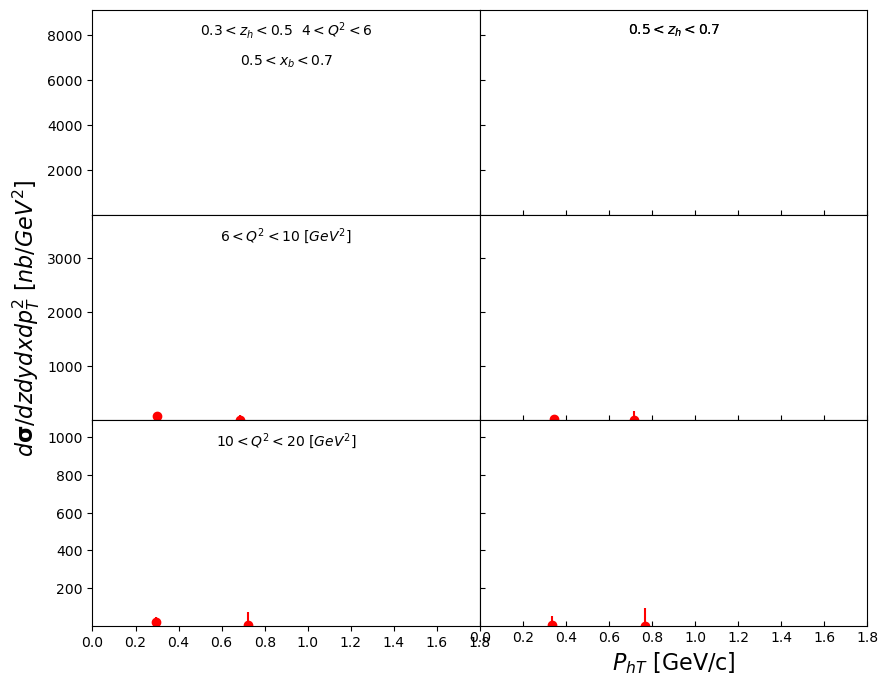

In [9]:
Q2_cuts=[4,6,10,20]
PhT_cuts=[0,0.4,0.45,0.5,0.55,0.6,0.7,0.8,1.6]
z_cuts=[0.3,0.5,0.7]
df_3xs_x2_zQ2_22=df_3xs_x1_22_zQ2xbjPhT[(df_3xs_x1_22_zQ2xbjPhT['Ebeam']==22)&(df_3xs_x1_22_zQ2xbjPhT['x']>xbj_cuts[2])&(df_3xs_x1_22_zQ2xbjPhT['x']<xbj_cuts[3])]
df_3xs_x2_zQ2_11_lQ2=df_3xs_x1_11_zQ2xbjPhT[(df_3xs_x1_11_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_11_zQ2xbjPhT['x']>xbj_cuts[2])&(df_3xs_x1_11_zQ2xbjPhT['x']<xbj_cuts[3])]
df_3xs_x2_zQ2_11_hQ2=df_3xs_x1_11_hQ2_zQ2xbjPhT[(df_3xs_x1_11_hQ2_zQ2xbjPhT['Ebeam']==11)&(df_3xs_x1_11_hQ2_zQ2xbjPhT['x']>xbj_cuts[2])&(df_3xs_x1_11_hQ2_zQ2xbjPhT['x']<xbj_cuts[3])]
df_3xs_x2_zQ2_11=pd.concat([df_3xs_zQ2_11_lQ2,df_3xs_zQ2_11_hQ2], ignore_index=True)

fig, axs = plt.subplots(len(Q2_cuts)-1,len(z_cuts)-1,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
Y_lim=[9111,3800,1090,590,99,100]
plt.xlabel('$P_{hT}$ [GeV/c]',fontsize=16)
plt.xlim(0,1.8)
for i_q2 in range(0,len(Q2_cuts)-1):
    print(Q2_cuts[i_q2])
    df_3xs_z_22=df_3xs_x2_zQ2_22[(df_3xs_x2_zQ2_22['Q2']>Q2_cuts[i_q2])&(df_3xs_x2_zQ2_22['Q2']<Q2_cuts[i_q2+1])]
    df_3xs_z_11=df_3xs_x2_zQ2_11[(df_3xs_x2_zQ2_11['Q2']>Q2_cuts[i_q2])&(df_3xs_x2_zQ2_11['Q2']<Q2_cuts[i_q2+1])]
    
    #print(df_3xs_z_11['Q2'])
    if Q2_cuts[i_q2]==4:
        PhT_cuts=[0,0.4,0.6,0.8,1.2,1.8]
    if Q2_cuts[i_q2]==6:
    #    z_cuts=[0.3,0.5,0.7]
        PhT_cuts=[0,0.6,1.8]
    for i_z in range(0,len(z_cuts)-1):
        print(z_cuts[i_z])
        #print(z_cuts[i_z])
        df_3xs_22=df_3xs_z_22[(df_3xs_z_22['z']>z_cuts[i_z])&(df_3xs_z_22['z']<z_cuts[i_z+1])]
        #print(len(df_3xs))
        Fuus_22=[]
        Fuu_stats_22=[]
        pTs_22=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT_22=df_3xs_22[(df_3xs_22['pT']>PhT_cuts[i_PhT-1])&(df_3xs_22['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
        
            _Fuu_22 = Get_weighted_average(df_3xs_PhT_22['value'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            _Fuu_stat_22 = Get_weighted_average(df_3xs_PhT_22['value'].tolist(),df_3xs_PhT_22['stat'].tolist())[1]
            _pT_22= Get_weighted_average_phi(df_3xs_PhT_22['pT'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            _z_22=Get_weighted_average_phi(df_3xs_PhT_22['z'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            _Q2_22=Get_weighted_average_phi(df_3xs_PhT_22['Q2'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            _x_22=Get_weighted_average_phi(df_3xs_PhT_22['x'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            
            _y_22=Get_weighted_average_phi(df_3xs_PhT_22['y'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            _sys = _Fuu_22*0.1
            Fuus_22.append(_Fuu_22)
            Fuu_stats_22.append(_Fuu_stat_22)
            pTs_22.append(_pT_22)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        axs[i_q2][i_z].errorbar(pTs_22,Fuus_22,Fuu_stats_22,color=color[2],ls='none')
        axs[i_q2][i_z].scatter(pTs_22,Fuus_22, color=color[2], label=legend)

        df_3xs_11=df_3xs_z_11[(df_3xs_z_11['z']>z_cuts[i_z])&(df_3xs_z_11['z']<z_cuts[i_z+1])]
        Fuus_11=[]
        Fuu_stats_11=[]
        pTs_11=[]
        for i_PhT in range(1,len(PhT_cuts)):
            df_3xs_PhT_11=df_3xs_11[(df_3xs_11['pT']>PhT_cuts[i_PhT-1])&(df_3xs_11['pT']<PhT_cuts[i_PhT])]
            #print(len(df_3xs_PhT))
        
            _Fuu_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            _Fuu_stat_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[1]
            _pT_11= Get_weighted_average_phi(df_3xs_PhT_11['pT'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            _z_11=Get_weighted_average_phi(df_3xs_PhT_11['z'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            _Q2_11=Get_weighted_average_phi(df_3xs_PhT_11['Q2'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            _x_11=Get_weighted_average_phi(df_3xs_PhT_11['x'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
            _y_11=Get_weighted_average_phi(df_3xs_PhT_11['y'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
            _sys = _Fuu_11*0.1
            Fuus_11.append(_Fuu_11)
            Fuu_stats_11.append(_Fuu_stat_11)
            pTs_11.append(_pT_11)
            i_counts+=1
        legend='z='+str(round((z_cuts[i_z-1]+z_cuts[i_z])/2,3))
        axs[i_q2][i_z].errorbar(pTs_11,Fuus_11,Fuu_stats_11,color=color[0],ls='none')
        axs[i_q2][i_z].scatter(pTs_11,Fuus_11, color=color[0], label=legend)
        axs[i_q2][i_z].set_ylim(1,Y_lim[i_q2])
        if i_z>0 and i_q2>0:
            axs[0][i_z].text(0.5,0.9,r'${}<z_h<{}$'.format(z_cuts[i_z],z_cuts[i_z+1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][i_z].transAxes)
            axs[i_q2][0].text(0.5,0.9,r'${}<Q^2<{}$ [$GeV^2$]'.format(Q2_cuts[i_q2],Q2_cuts[i_q2+1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_q2][0].transAxes)
        
        if i_z>0 and i_q2<len(Q2_cuts)-1:
            axs[i_q2][i_z].tick_params(direction='in',labelleft=False)
axs[0][0].text(0.5,0.9,r'${}<z_h<{}\ \   {}<Q^2<{}$ '.format(z_cuts[0],z_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[0][0].text(0.5,0.75,r'${}<x_{{b}}<{}$'.format(xbj_cuts[2],xbj_cuts[3]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
axs[1][0].set_ylabel(r'${d \bf{\sigma}}/{dzdydxdp^2_{T}}$ [$nb/GeV^2$]',fontsize=16)   
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/11_22_zQ2_x3.pdf')    

In [10]:
z_cuts=[0.3,0.4,0.5,0.6,0.7]
Q2_cuts=[1,2,4,6,10,20]
#Q2_cuts=[2,4,6,10,20]
#Q2_cuts=[1,3,6,10,20]
xbj_cuts=[0,0.25,0.5,0.7]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.4,0.45,0.5,0.55,0.6,0.7,0.8,1.6]

In [11]:
df_3xs_zQ2x_22=df_3xs_x1_22_zQ2xbjPhT[(df_3xs_x1_22_zQ2xbjPhT['Ebeam']==22)]
df_3xs_zQ2x_11_lQ2=df_3xs_x1_11_zQ2xbjPhT[(df_3xs_x1_11_zQ2xbjPhT['Ebeam']==11)]
df_3xs_zQ2x_11_hQ2=df_3xs_x1_11_hQ2_zQ2xbjPhT[(df_3xs_x1_11_hQ2_zQ2xbjPhT['Ebeam']==11)]
df_3xs_zQ2x_11=pd.concat([df_3xs_zQ2x_11_lQ2,df_3xs_zQ2x_11_hQ2], ignore_index=True)

1
0.3
0.4
0.5
0.6
0.3
0.4
0.5
0.6
0.3
not add points for 22
0.4
not add points for 22
0.5
not add points for 22
0.6
not add points for 22
2
0.3
0.4
0.5
0.6
0.3
0.4
0.5
0.6
0.3
not add points
0.4
not add points
0.5
not add points
0.6
not add points
4
0.3
0.5
0.3
0.5
0.3
not add points for 22
0.5
not add points for 22
8
0.3
not add points
0.5
not add points
0.3
not add points
0.5
not add points
0.3
not add points
0.5
not add points


/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_77900/4242115647.py:65: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[i_q2][i_xbj].scatter(pTs_22,Fuus_22, color=color[i_z], marker='s', label=legend_22)
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_77900/4242115647.py:95: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[i_q2][i_xbj].scatter(pTs_11,Fuus_11, color=color[i_z],facecolors='none', label=legend_11)
/var/folders/j9/hgt6bjfn0n78rvsbnlc10rqh0000gp/T/ipykernel_77900/4242115647.py:97: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axs[i_q2][i_xbj].set_ylim(Y_low[i_q2],Y_lim[i_q2])


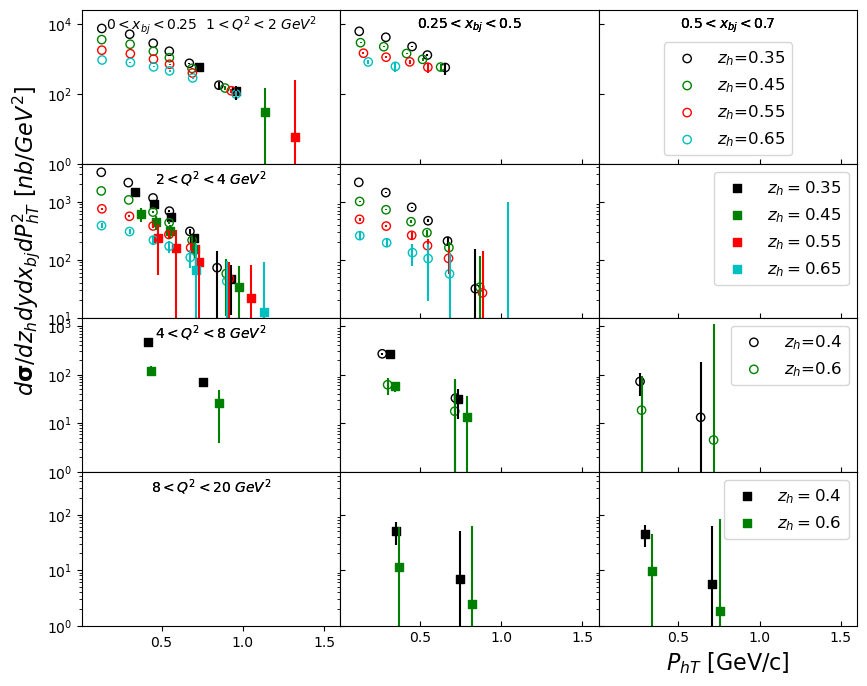

In [12]:
z_cuts=[0.3,0.4,0.5,0.6,0.7]
Q2_cuts=[1,2,4,8,20]
#Q2_cuts=[2,4,6,10,20]
#Q2_cuts=[1,3,6,10,20]
xbj_cuts=[0,0.25,0.5,0.7]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.2,0.4,0.5,0.6,0.8,1.6]

fig, axs = plt.subplots(len(Q2_cuts)-1,len(xbj_cuts)-1,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
Y_low=[1,10,1,1,1] 
Y_lim=[25111,4500,1490,590,99,100]
plt.xlabel('$P_{hT}$ [GeV/c]',fontsize=16)
plt.xlim(0.01,1.6)

for i_q2 in range(0,len(Q2_cuts)-1):
    print(Q2_cuts[i_q2])
    df_3xs_zx_22=df_3xs_zQ2x_22[(df_3xs_zQ2x_22['Q2']>Q2_cuts[i_q2])&(df_3xs_zQ2x_22['Q2']<Q2_cuts[i_q2+1])]
    df_3xs_zx_11=df_3xs_zQ2x_11[(df_3xs_zQ2x_11['Q2']>Q2_cuts[i_q2])&(df_3xs_zQ2x_11['Q2']<Q2_cuts[i_q2+1])]
    
    #print(df_3xs_z_11['Q2'])
   
    for i_xbj in range(0,len(xbj_cuts)-1):
        df_3xs_z_22=df_3xs_zx_22[(df_3xs_zx_22['Ebeam']==22)&(df_3xs_zx_22['x']>xbj_cuts[i_xbj])&(df_3xs_zx_22['x']<xbj_cuts[i_xbj+1])]
        df_3xs_z_11=df_3xs_zx_11[(df_3xs_zx_11['Ebeam']==11)&(df_3xs_zx_11['x']>xbj_cuts[i_xbj])&(df_3xs_zx_11['x']<xbj_cuts[i_xbj+1])]
        if Q2_cuts[i_q2]==4:
            z_cuts=[0.3,0.5,0.7]
            PhT_cuts=[0,0.6,1.8]
        if Q2_cuts[i_q2]==6:
            z_cuts=[0.3,0.7]
        for i_z in range(0,len(z_cuts)-1):
            print(z_cuts[i_z])
            #print(z_cuts[i_z])
            df_3xs_22=df_3xs_z_22[(df_3xs_z_22['z']>z_cuts[i_z])&(df_3xs_z_22['z']<z_cuts[i_z+1])]
            #print(len(df_3xs))
            Fuus_22=[]
            Fuu_stats_22=[]
            pTs_22=[]
            for i_PhT in range(1,len(PhT_cuts)):
                df_3xs_PhT_22=df_3xs_22[(df_3xs_22['pT']>PhT_cuts[i_PhT-1])&(df_3xs_22['pT']<PhT_cuts[i_PhT])]
                #print(len(df_3xs_PhT))
        
                _Fuu_22 = Get_weighted_average(df_3xs_PhT_22['value'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
                _Fuu_stat_22 = Get_weighted_average(df_3xs_PhT_22['value'].tolist(),df_3xs_PhT_22['stat'].tolist())[1]
                _pT_22= Get_weighted_average_phi(df_3xs_PhT_22['pT'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
                _z_22=Get_weighted_average_phi(df_3xs_PhT_22['z'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
                _Q2_22=Get_weighted_average_phi(df_3xs_PhT_22['Q2'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
                _x_22=Get_weighted_average_phi(df_3xs_PhT_22['x'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
            
                _y_22=Get_weighted_average_phi(df_3xs_PhT_22['y'].tolist(),df_3xs_PhT_22['stat'].tolist())[0]
                _sys = _Fuu_22*0.1
                Fuus_22.append(_Fuu_22)
                Fuu_stats_22.append(_Fuu_stat_22)
                pTs_22.append(_pT_22)
                i_counts+=1
            legend_22=r'$z_h=$'+str(round((z_cuts[i_z]+z_cuts[i_z+1])/2,3))
            axs[i_q2][i_xbj].set_yscale("log")
            #if i_q2>0 or i_xbj<2:
            if (i_q2==0 and i_xbj==2) or (i_q2==2 and i_xbj==2):
                print('not add points for 22')
            else:
                axs[i_q2][i_xbj].errorbar(pTs_22,Fuus_22,Fuu_stats_22,color=color[i_z],ls='none')
                axs[i_q2][i_xbj].scatter(pTs_22,Fuus_22, color=color[i_z], marker='s', label=legend_22)

            df_3xs_11=df_3xs_z_11[(df_3xs_z_11['z']>z_cuts[i_z])&(df_3xs_z_11['z']<z_cuts[i_z+1])]
            Fuus_11=[]
            Fuu_stats_11=[]
            pTs_11=[]
            for i_PhT in range(1,len(PhT_cuts)):
                df_3xs_PhT_11=df_3xs_11[(df_3xs_11['pT']>PhT_cuts[i_PhT-1])&(df_3xs_11['pT']<PhT_cuts[i_PhT])]
                #print(len(df_3xs_PhT))
        
                _Fuu_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _Fuu_stat_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[1]
                _pT_11= Get_weighted_average_phi(df_3xs_PhT_11['pT'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _z_11=Get_weighted_average_phi(df_3xs_PhT_11['z'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _Q2_11=Get_weighted_average_phi(df_3xs_PhT_11['Q2'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _x_11=Get_weighted_average_phi(df_3xs_PhT_11['x'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y_11=Get_weighted_average_phi(df_3xs_PhT_11['y'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _sys = _Fuu_11*0.1
                Fuus_11.append(_Fuu_11)
                Fuu_stats_11.append(_Fuu_stat_11)
                pTs_11.append(_pT_11)
                i_counts+=1
            legend_11=r'$z_h$='+str(round((z_cuts[i_z]+z_cuts[i_z+1])/2,3))
            #if i_q2!=1 or i_xbj!=2  and Q2_cuts[i_q2]<9:
            if (i_q2==1 and i_xbj==2) or (i_q2==3):
                print('not add points')
                #legend_11='z='+str(round((z_cuts[i_z]+z_cuts[i_z+1])/2,3))
            else:
                axs[i_q2][i_xbj].errorbar(pTs_11,Fuus_11,Fuu_stats_11,color=color[i_z],ls='none')
                axs[i_q2][i_xbj].scatter(pTs_11,Fuus_11, color=color[i_z],facecolors='none', label=legend_11)

            axs[i_q2][i_xbj].set_ylim(Y_low[i_q2],Y_lim[i_q2])
        if i_xbj>0 and i_q2>0:
            axs[0][i_xbj].text(0.5,0.9,r'${}<x_{{bj}}<{}$'.format(xbj_cuts[i_xbj],xbj_cuts[i_xbj+1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][i_xbj].transAxes)
            axs[i_q2][0].text(0.5,0.9,r'${}<Q^2<{}$ $GeV^2$'.format(Q2_cuts[i_q2],Q2_cuts[i_q2+1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_q2][0].transAxes)
        
        if i_xbj>0 and i_q2<len(Q2_cuts)-1:
            axs[i_q2][i_xbj].tick_params(direction='in',labelleft=False)
axs[1][0].set_ylabel(r'${d \bf{\sigma}}/{dz_hdydx_{bj}dP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
axs[0][2].legend(fontsize=12,loc="lower center")
axs[1][2].legend(fontsize=12)
axs[3][2].legend(fontsize=12)
axs[2][2].legend(fontsize=12)
axs[0][0].text(0.5,0.9,r'${}<x_{{bj}}<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(xbj_cuts[0],xbj_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
#axs[0][0].text(0.5,0.75,r'${}<x_{{b}}<{}$'.format(xbj_cuts[0],xbj_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/11_22_xQ2.pdf')    

1
0.3
0.4
0.5
0.6
0.3
0.4
0.5
0.6
0.3
0.4
0.5
0.6
2
0.3
0.4
0.5
0.6
0.3
0.4
0.5
0.6
0.3
not add points
0.4
not add points
0.5
not add points
0.6
not add points
3
0.3
0.5
0.3
0.5
0.3
0.5


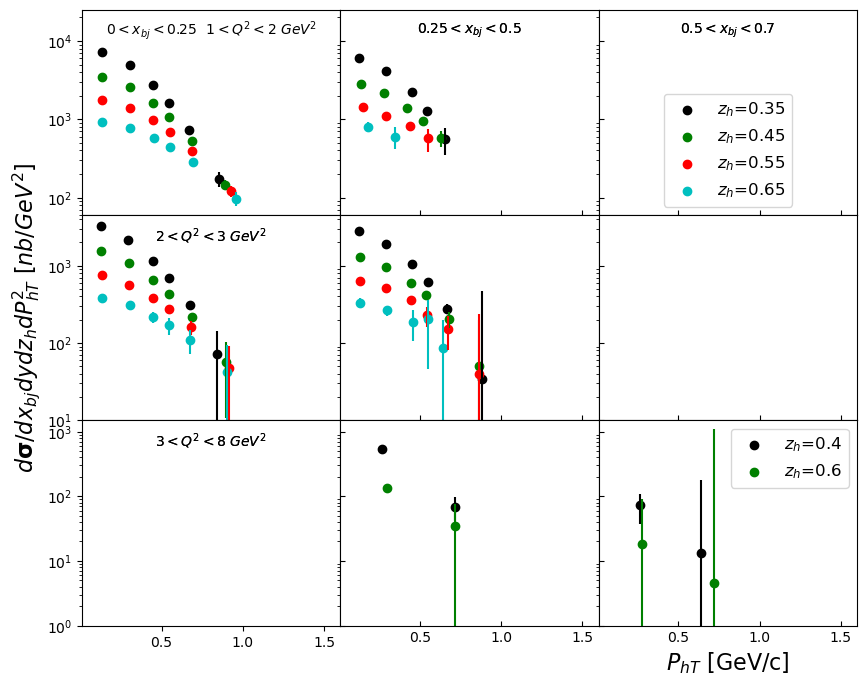

In [36]:
z_cuts=[0.3,0.4,0.5,0.6,0.7]
Q2_cuts=[1,2,3,8,20]
#Q2_cuts=[2,4,6,10,20]
#Q2_cuts=[1,3,6,10,20]
xbj_cuts=[0,0.25,0.5,0.7]

#PhT_cuts=[0,0.1,0.2,0.3,0.4,0.6,0.8,1.6]
PhT_cuts=[0,0.2,0.4,0.5,0.6,0.8,1.6]

fig, axs = plt.subplots(len(Q2_cuts)-2,len(xbj_cuts)-1,figsize=(10,8),sharex=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
Y_low=[1,10,1,1,1] 
Y_lim=[11111,4500,690,590,99,100]
Y_low=[60,10,1,1,1] 
Y_lim=[25111,4500,1490,590,99,100]
plt.xlabel('$P_{hT}$ [GeV/c]',fontsize=16)
plt.xlim(0.01,1.6)

for i_q2 in range(0,len(Q2_cuts)-2):
    print(Q2_cuts[i_q2])
    df_3xs_zx_22=df_3xs_zQ2x_22[(df_3xs_zQ2x_22['Q2']>Q2_cuts[i_q2])&(df_3xs_zQ2x_22['Q2']<Q2_cuts[i_q2+1])]
    df_3xs_zx_11=df_3xs_zQ2x_11[(df_3xs_zQ2x_11['Q2']>Q2_cuts[i_q2])&(df_3xs_zQ2x_11['Q2']<Q2_cuts[i_q2+1])]
    
    #print(df_3xs_z_11['Q2'])
   
    for i_xbj in range(0,len(xbj_cuts)-1):
        df_3xs_z_22=df_3xs_zx_22[(df_3xs_zx_22['Ebeam']==22)&(df_3xs_zx_22['x']>xbj_cuts[i_xbj])&(df_3xs_zx_22['x']<xbj_cuts[i_xbj+1])]
        df_3xs_z_11=df_3xs_zx_11[(df_3xs_zx_11['Ebeam']==11)&(df_3xs_zx_11['x']>xbj_cuts[i_xbj])&(df_3xs_zx_11['x']<xbj_cuts[i_xbj+1])]
        if Q2_cuts[i_q2]==3:
            z_cuts=[0.3,0.5,0.7]
            PhT_cuts=[0,0.6,1.8]
        if Q2_cuts[i_q2]==6:
            z_cuts=[0.3,0.7]
        for i_z in range(0,len(z_cuts)-1):
            print(z_cuts[i_z])
            
            df_3xs_11=df_3xs_z_11[(df_3xs_z_11['z']>z_cuts[i_z])&(df_3xs_z_11['z']<z_cuts[i_z+1])]
            Fuus_11=[]
            Fuu_stats_11=[]
            pTs_11=[]
            for i_PhT in range(1,len(PhT_cuts)):
                df_3xs_PhT_11=df_3xs_11[(df_3xs_11['pT']>PhT_cuts[i_PhT-1])&(df_3xs_11['pT']<PhT_cuts[i_PhT])]
                #print(len(df_3xs_PhT))
        
                _Fuu_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _Fuu_stat_11 = Get_weighted_average(df_3xs_PhT_11['value'].tolist(),df_3xs_PhT_11['stat'].tolist())[1]
                _pT_11= Get_weighted_average_phi(df_3xs_PhT_11['pT'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _z_11=Get_weighted_average_phi(df_3xs_PhT_11['z'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _Q2_11=Get_weighted_average_phi(df_3xs_PhT_11['Q2'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _x_11=Get_weighted_average_phi(df_3xs_PhT_11['x'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                #_phih=Get_weighted_average_phi(df_3xs_PhT['phih'].tolist(),df_3xs_PhT['stat'].tolist())[0]
                _y_11=Get_weighted_average_phi(df_3xs_PhT_11['y'].tolist(),df_3xs_PhT_11['stat'].tolist())[0]
                _sys = _Fuu_11*0.1
                Fuus_11.append(_Fuu_11)
                Fuu_stats_11.append(_Fuu_stat_11)
                pTs_11.append(_pT_11)
                i_counts+=1
            legend_11=r'$z_h$='+str(round((z_cuts[i_z]+z_cuts[i_z+1])/2,3))
            #if i_q2!=1 or i_xbj!=2  and Q2_cuts[i_q2]<9:
            if (i_q2==1 and i_xbj==2) or (i_q2==3):
                print('not add points')
                #legend_11='z='+str(round((z_cuts[i_z]+z_cuts[i_z+1])/2,3))
            else:
                axs[i_q2][i_xbj].errorbar(pTs_11,Fuus_11,Fuu_stats_11,color=color[i_z],ls='none')
                axs[i_q2][i_xbj].scatter(pTs_11,Fuus_11, color=color[i_z], label=legend_11)

            axs[i_q2][i_xbj].set_ylim(Y_low[i_q2],Y_lim[i_q2])
            axs[i_q2][i_xbj].set_yscale("log")
        if i_xbj>0 and i_q2>0:
            axs[0][i_xbj].text(0.5,0.9,r'${}<x_{{bj}}<{}$'.format(xbj_cuts[i_xbj],xbj_cuts[i_xbj+1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][i_xbj].transAxes)
            axs[i_q2][0].text(0.5,0.9,r'${}<Q^2<{}$ $GeV^2$'.format(Q2_cuts[i_q2],Q2_cuts[i_q2+1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_q2][0].transAxes)
        
        if i_xbj>0 and i_q2<len(Q2_cuts)-1:
            axs[i_q2][i_xbj].tick_params(direction='in',labelleft=False)
axs[1][0].set_ylabel(r'${d \bf{\sigma}}/{dx_{bj}dydz_hdP^2_{hT}}$ [$nb/GeV^2$]',fontsize=16)
axs[0][2].legend(fontsize=12,loc="lower center")
#axs[1][2].legend(fontsize=14)
#axs[3][2].legend(fontsize=12)
axs[2][2].legend(fontsize=12)
axs[0][0].text(0.5,0.9,r'${}<x_{{bj}}<{}\ \   {}<Q^2<{}$ $GeV^2$'.format(xbj_cuts[0],xbj_cuts[1],Q2_cuts[0],Q2_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
#axs[0][0].text(0.5,0.75,r'${}<x_{{b}}<{}$'.format(xbj_cuts[0],xbj_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[0][0].transAxes)
plt.savefig('../Unpol_proposal/Materials/results_June2024/onephi_Sep/11_xQ2.pdf')    